# Исследование объявлений о продаже квартир

В качестве базы для исследований был использован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.    

Задача — установить параметры определения рыночной стоимости жилья. Это позволило бы построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.  

**Описание данных**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

 — расстояние до ближайшего аэропорта в метрах   
 — число балконов     
 — высота потолков (м)   
 — расстояние до центра города (м)   
 — сколько дней было размещено объявление (от публикации до снятия)   
 — дата публикации    
 — этаж   
 — всего этажей в доме    
 — апартаменты (булев тип)    
 — площадь кухни в квадратных метрах (м²)    
 — цена на момент снятия с публикации    
 — жилая площадь в квадратных метрах (м²)    
 — название населённого пункта     
 — свободная планировка (булев тип)    
 — число парков в радиусе 3 км    
 — расстояние до ближайшего парка (м)    
 — число водоёмов в радиусе 3 км    
 — расстояние до ближайшего водоёма (м)   
 — число комнат   
 — квартира-студия (булев тип)   
 — площадь квартиры в квадратных метрах (м²)   
 — число фотографий квартиры в объявлении   

<h1>Содержание<span class="tocSkip"></span></h1>   
   
   
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"></ul></li> <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import warnings

data = pd.read_csv('C:\\Users\\Настя\\Desktop\\Портфолио\\базы данных\\real_estate_data.csv', sep='\t')

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датасет содержит 22 столбца с данными. Количество значений неодинаково, значит имеются пропуски. 

## Предобработка данных

In [2]:
data.isna().sum() 
data.dropna(subset=['floors_total'], inplace=True) 
data.dropna(subset=['locality_name'], inplace=True)

share_of_living_area = (data['living_area'].sum()) / data['total_area'].sum()
data['living_area'] = data['living_area'].fillna(value=(data['total_area']*share_of_living_area))
share_of_kitchen_area = (data['kitchen_area'].sum() / data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(value=(data['total_area']*share_of_kitchen_area))

data['ceiling_height'] = data['ceiling_height'].fillna(value=stat.mode(data['ceiling_height'])) 

data['balcony'] = data['balcony'].fillna(0) 

data['locality_name'] = data['locality_name'].str.lower() 
data['locality_name'].unique() 
undue_locality_name = ['посёлок ', 'городской посёлок ', "деревня ", "поселок городского типа ", "поселок ", "садовое товарищество ", 'городской ', "городского типа ", "село ", 'коттеджный ']
undue_locality_name = '|'.join(undue_locality_name)
data['locality_name'] = data['locality_name'].str.replace(undue_locality_name, '')
data['locality_name'].unique() 

data[data['days_exposition']==0] 
data['days_exposition'] = data['days_exposition'].fillna(1)

data['is_apartment'] = data['is_apartment'].fillna(False)

data['floors_total'] = data['floors_total'].astype('int64') 
data['balcony'] = data['balcony'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool') 
data['days_exposition'] = data['days_exposition'].astype('int64')

display(data.head())
data.info()

C:\Users\Настя\AppData\Local\Temp\ipykernel_17040\3785122027.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  data['locality_name'] = data['locality_name'].str.replace(undue_locality_name, '')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,1
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11,18.600000,1,False,...,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5,34.300000,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14,83.629164,9,False,...,225403.3,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

## Расчёты и добавление результатов в таблицу

In [3]:
data['metr_price'] = data['last_price'] / data['total_area']
data['metr_price'] = round(data['metr_price'], 2)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['first_exposition_month'] = data['first_day_exposition'].dt.month
data['first_exposition_year'] = data['first_day_exposition'].dt.year

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другое'

data['floor_category'] = data.apply(floor_category, axis=1)

data['ratio_living_total'] = data['living_area'] / data['total_area']
data['ratio_living_total'] = round(data['ratio_living_total'], 2)

data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']
data['ratio_kitchen_total'] = round(data['ratio_kitchen_total'], 2)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,metr_price,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_category,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,1,120370.37,3,3,2019,другое,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.600000,1,False,...,0.0,NaN,81,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.300000,4,False,...,2.0,574.0,558,92785.71,3,8,2015,другое,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,83.629164,9,False,...,3.0,234.0,424,408176.10,4,7,2015,другое,0.53,1417.63
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121,100000.00,1,6,2018,другое,0.32,0.41


## Исследовательский анализ данных

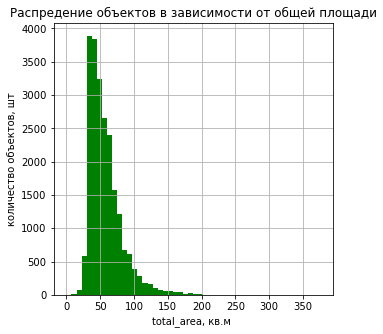

In [35]:
plt.figure(figsize=(5, 5))
data['total_area'].plot(kind='hist',
    range=(0, 375),
    bins=50, 
    grid=True,
    color = 'green'
)

plt.title('Распредение объектов в зависимости от общей площади')
plt.xlabel('total_area, кв.м ')
plt.ylabel('количество объектов, шт')
plt.show()

Из гистограммы общей площади объектов недвижимости видно, что больше всего объектов на рынке имеют площади от 40 до 50 квадратных метров. Площадь самого крупного объекта находится в районе 350 квадратных метров. Распределение нормальное со смещением влево.

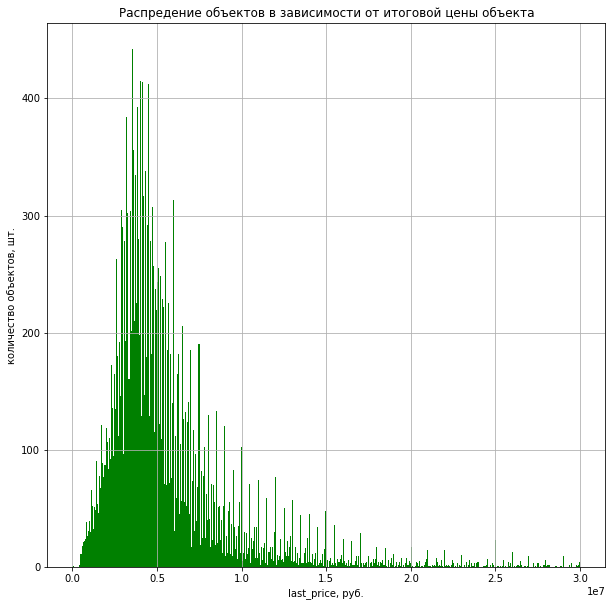

In [36]:
plt.figure(figsize=(5, 5))

data['last_price'].plot(kind='hist',
    bins=500, 
    grid=True,
    figsize=(10,10),
    color = 'green')

plt.title('Распредение объектов в зависимости от итоговой цены объекта')
plt.xlabel('last_price, руб.')
plt.ylabel('количество объектов, шт.')
plt.show()

Разброс между максимальным и минимальным значение стоимости объектов на рынке очень велик. Распределение нормальное со смещением влево. 

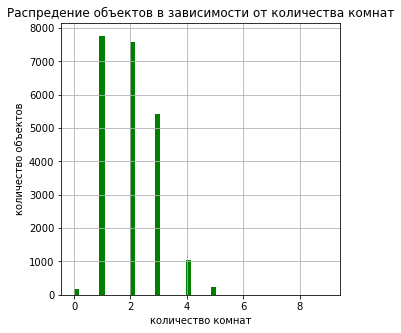

In [38]:
plt.figure(figsize=(5, 5))
data['rooms'].plot(kind='hist',
    range=(0,9),
    bins=50, 
    grid=True,
    color = 'green')

plt.title('Распредение объектов в зависимости от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество объектов')
plt.show()

На рыке представлено больше всего однокомнатных квартир, чуть меньше двухкомнатных. Максимальнок количество комнат среди объктов базы данных - 8. Предположим, что 0 комнат - это студии.

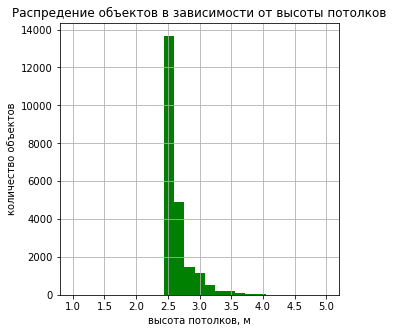

In [39]:
plt.figure(figsize=(5, 5))
data['ceiling_height'].plot(kind='hist',
    bins=25, 
    range=(1, 5),
    grid=True,
    color = 'green')

plt.title('Распредение объектов в зависимости от высоты потолков')
plt.xlabel('высота потолков, м')
plt.ylabel('количество объектов')
plt.show()

На показания гистограммы о высоте потолков могло повлиять то, что пропущенные значения мы заполняли значение моды - 2.4 метра.

count    22259.000000
mean       129.434476
std        153.091910
min          1.000000
25%         21.000000
50%         68.000000
75%        179.000000
max        729.000000
Name: days_exposition, dtype: float64

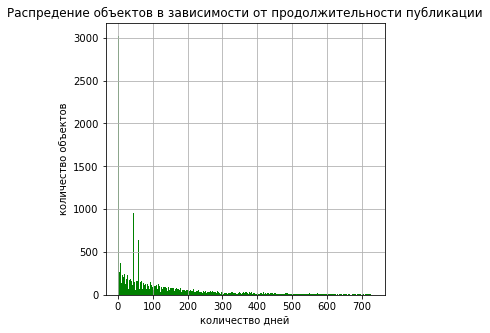

In [40]:
display(data['days_exposition'].describe())

plt.figure(figsize=(5, 5))
data['days_exposition'].plot(kind='hist',
    bins=400,
    grid=True,
    color = 'green')

plt.title('Распредение объектов в зависимости от продолжительности публикации')
plt.xlabel('количество дней')
plt.ylabel('количество объектов')
plt.show()

В среднем продажа недвижимости на рынке Санкт-Петербурга и Ленинградской области занимает 157 дней с момента публикации объявления. Будем считать, что если квартира продаётся менее чем за 73 дня, то это быстрая продажа. Больше 73 дней - длинная продажа объекта.

Значительные пики в диапазоне от 0 до 150 связаны с тем, что у системы есть возможность снятия объявления об объекте с публикации при определённых условиях. Например: снятие с публикации через 30 дней если продавец не подтвердил свои контактные данные (email, телефон). Возможно пики характеризуют продолжительность всей сделки по оформлениею документов и переходу права собственности при условии, что продавцы показали покупателю квартиру в первый же день публикации и у них были все документы на руках.

In [41]:
data[data['total_area'] > 300]['total_area'].count() 

data[data['last_price'] > 30000000]['last_price'].count()
data = data.query('last_price < 30000000')

data[data['rooms'] > 6]['rooms'].count()
data = data.query('rooms < 6')

data[data['ceiling_height'] < 2.4]['ceiling_height'].count()
data = data.query('ceiling_height > 2.4')

data[data['ceiling_height'] > 4]['ceiling_height'].count()
data = data.query('ceiling_height < 4')

data[data['days_exposition'] > 730]['days_exposition'].count()
data = data.query('days_exposition < 730')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22259 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              22259 non-null  int64         
 1   last_price                22259 non-null  float64       
 2   total_area                22259 non-null  float64       
 3   first_day_exposition      22259 non-null  datetime64[ns]
 4   rooms                     22259 non-null  int64         
 5   ceiling_height            22259 non-null  float64       
 6   floors_total              22259 non-null  int64         
 7   living_area               22259 non-null  float64       
 8   floor                     22259 non-null  int64         
 9   is_apartment              22259 non-null  bool          
 10  studio                    22259 non-null  bool          
 11  open_plan                 22259 non-null  bool          
 12  kitchen_area      

Убрав редкие и выбивающиеся значения мы сократили массив данных до 22 259 строк.

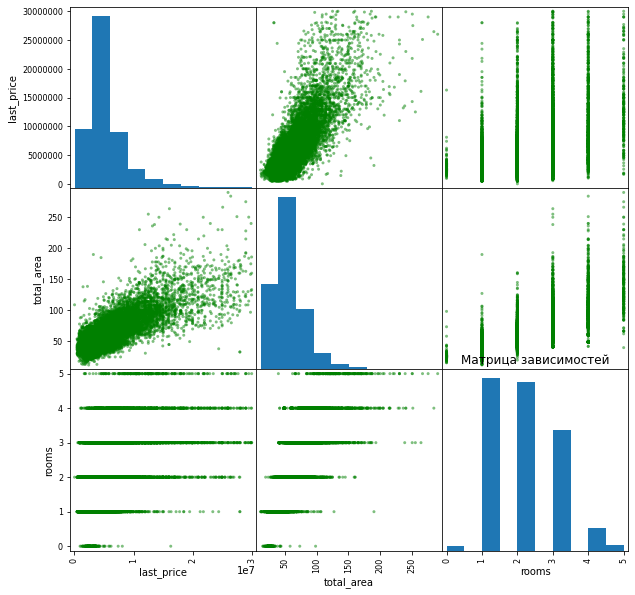

In [43]:
columns_for_visualization = ['last_price', 'total_area', 'rooms']
data_for_visualization = data[columns_for_visualization]

pd.plotting.scatter_matrix(data_for_visualization, figsize=(10, 10), color = 'green')
plt.title('Матрица зависимостей')
plt.show()

Из гистограммы по данным о цене объектов видно, что большинство объектов стоимостью более 10 миллионов рублей. 

Связь цены и общей площади: есть тенденция к прямой связи - чем боле площадь, тем больше цена, но втречается большое количество
нетипичных значений и с увеличением цены связь становится менее характерной. Возможно это связано с самим количество объектов:
в базе меньше объектов крупной площади и с высокой ценой. 

Связь цены и количества комнат: нет чёткой зависимости. Например, если рассматривать ценовой диапазон от 5 до 10 миллионов
рублей, то в нём встречается достатовно большое количество объектов и с 1, и с 2, и с 3, и с 4 комнатами. 
Можно проследить небольшую зависисмость при цене объекта более 10 миллионов рублей: чем больше комнат, тем больше цена.
Но при количестве в 5 комнат данная тенденция теряется. (возможно потому что 5 и более комнат - 
это скорре исключение на рынке недвижимости).

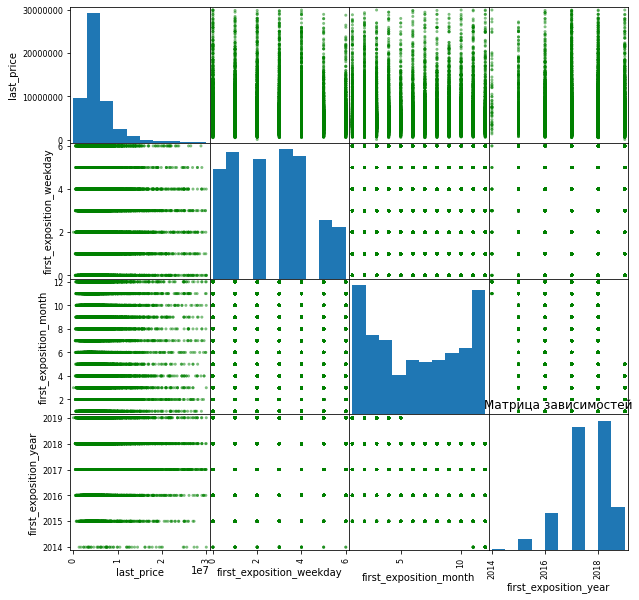

In [44]:
datetime_visualization = ['last_price','first_exposition_weekday', 'first_exposition_month', 'first_exposition_year']
data_datetime_visualization = data[datetime_visualization]

pd.plotting.scatter_matrix(data_datetime_visualization , figsize=(10, 10), color = 'green')
plt.title('Матрица зависимостей')
plt.show()

Зависимость цены от дня недели: если рассматривать будни, то не наблюдается существенных различий. Больше всего объявлений публикуют по четвергам. В субботу и воскресение публикуют меньше дорогостоящих объектов, чем в рабочие дни недели.

Зависимость цены от месяца публикации: значительных различий цен объектов между месяцами нет.

Зависимость цены от года публикации: в 2014 году объявлений было значительно меньше, чем в другие месяцы, но были как недорогие, так и состоимостью выше среднего. В 2015 году не было сверхдорогих объектов. В 2019 году вновь объявлений о дорогостоящих объектах стало меньше. Можно сказать, что нет зависииости цены от года публикации. 

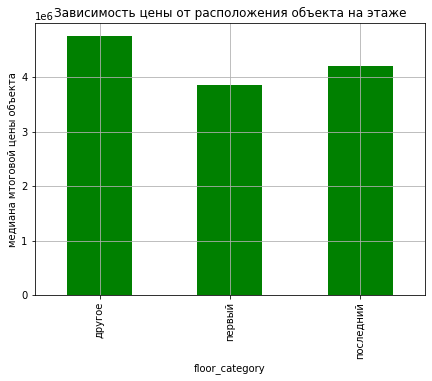

In [48]:
plt.figure(figsize=(7,5))
data.groupby('floor_category')['last_price'].median().plot(kind='bar', grid=True, color = 'green')
plt.title('Зависимость цены от расположения объекта на этаже')
plt.ylabel('медиана мтоговой цены объекта')
plt.show()

Если учитывать медиану цены объектов по категорям этажей, то самые недорогие квартиры располагаются на первом и последнем этажах.

In [13]:
top_locality = data['locality_name'].value_counts().sort_values(ascending = False).head(10).index.values
data_for_locality_analitics = data[data['locality_name'].isin(top_locality)]

data_for_locality_analitics.pivot_table(index='locality_name', values='metr_price').sort_values(by='metr_price') #рассчитываем среднюю стоимость квадратного метра

,metr_price
locality_name,
выборг,58360.543911
всеволожск,68735.518512
гатчина,68923.447491
колпино,75282.176545
шушары,78522.230117
мурино,86111.069435
парголово,90179.108025
кудрово,95464.160958
пушкин,102847.831792


Самая большая стоимость квадратного метра ожидаемо в Санкт-Петербурге. Самый недорогой квадратный метр из самых многочисленно представленных в базе населённых пунктов находится в г. Выборг.

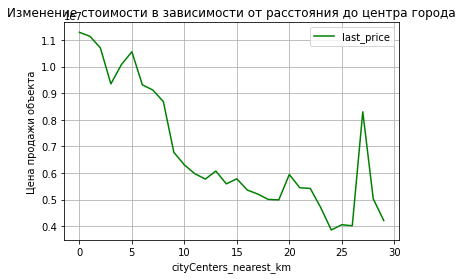

In [55]:
spb_data = data[data['locality_name'] == "санкт-петербург"]

spb_data.dropna(subset=['cityCenters_nearest'], inplace=True)

spb_data['cityCenters_nearest_km'] = (spb_data['cityCenters_nearest']/1000).round()

(spb_data
     .pivot_table(index='cityCenters_nearest_km', values='last_price')
     .plot(grid=True, color = 'green')
)

plt.title('Изменение стоимости в зависимости от расстояния до центра города')
plt.ylabel('Цена продажи объекта')
plt.show()

warnings.filterwarnings("ignore")

Смотря на график я бы провела границу центра города на 20ом километре.

In [15]:
spb_data_center = spb_data[spb_data['cityCenters_nearest_km'] <= 6]
spb_data_center['total_area'].describe()

count    2549.000000
mean       80.322268
std        34.968000
min        12.000000
25%        55.200000
50%        75.000000
75%        98.000000
max       290.000000
Name: total_area, dtype: float64

Самый большой объект в центре Петербурга имеет лощадь 290 квадратных метров. Это гораздо выше среднего показателя для данного района, который составляет 80 квадратных метров. Исходя из того, что медианное значение показателя ниже, можно сделать вывод, что большая часть объектов недвижимости в центре меньше среднего.

In [16]:
spb_data_center['rooms'].describe()

count    2549.000000
mean        2.608866
std         1.107106
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

В центре Санкт-Петербурга каждый сможет найти подходящий объект, т.к. здесь представлены все варианты количества комнат.

In [17]:
spb_data_center['ceiling_height'].describe()

count    2549.000000
mean        2.863833
std         0.366940
min         2.450000
25%         2.500000
50%         2.800000
75%         3.100000
max         3.980000
Name: ceiling_height, dtype: float64

Средняя высота потолков в центре Санк-Петербурга составляет 2,86 м. Самые высокие потолки - 3,98 м. Т.к. медианное значение меньше среднего, можно предположить, что в большинстве квартир потолки меньше среднего. По всей базе медианное значение потолков составляло 2.4 м. Значит в центре Санкт-Петербурга потолки в среднем выше, чем по области. Также замена пропусков на медианное значение могла повлиять на итоговую статистику. 

In [18]:
print(spb_data_center['last_price'].max())
spb_data_center['last_price'].mean()

29999000.0


10110049.064731266

Средняя стоимость квартир в центре Санкт-Петербурга составляет 10 миллионов рублей (неожиданно мало, но учитывая, что в базе представлены данные с 2014 года, возможно это правда).

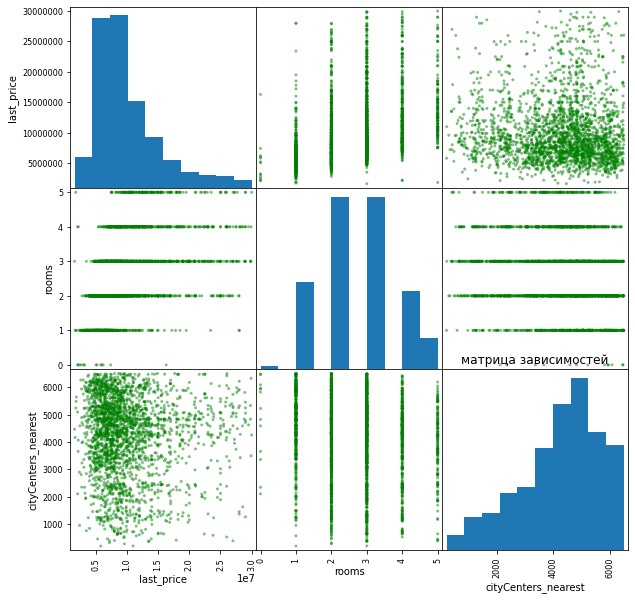

In [59]:
columns_for_center_spb_contrast = ['last_price', 'rooms', 'floor_category', 'cityCenters_nearest']
center_spb_visualization = spb_data_center[columns_for_center_spb_contrast]
all_region_visualization = data[columns_for_center_spb_contrast]

pd.plotting.scatter_matrix(center_spb_visualization, figsize=(10, 10), color = 'green')
plt.title('матрица зависимостей')
plt.show()

В центре Санкт-Петербурга меньше однокомнатных квартир и студий, чем в общем в городе и области. Больше всего трёх- и четырёх-комнатных квартир. 
Цена же квартир не находится в прямой зависимости от расстояниия от центра города. Распределение не похоже на нормальное. Объекты одной и той же ценовой категории могуть находиться на разном расстоянии от ценра города. Это свидетельствует о развитой инфраструктуре Санкт-Петербурга и уходу от центрической модели развития города. 

## Общий вывод

1. В данных Яндекс-Недвижимости было много пропусков. При выборе недвижимости важна каждая мелочь. Посетитель, который потратил время на обсуждение объекта, который ему не подошёл будь все данные заполнены, по итогу будет недоволен взаимодействием с сервисом.
2. Средний размер объектов Яндекс-недвижимости от 40 до 50 квадратных метров. Этот показатель чуть больше для центра Санкт-Петербурга, вероятно так исторически сложилось. 
3. Разброс от максимального значения до минимального на рынке Недвижимости значителен.
4. Чем ближе к центру крупного города, тем больше комнат в квартире.
5. Покупка недвижимости - серьёзный шаг для среднестатистического жителя нашей страны, поэтому публикации преимущественно актуальны долгое время.
6. Нельзя дать рекомендации по предпочтительному дню публикации объявления.
7. 2018 год был пиком пользования сервисом. Спад в 2019 году можно связать как со падом на рынке недвижимости (хотя люди в больших городах активно выходили на рынок загородной недвижимости), так и с проблемами с работой с сервисом (вернёмся к п.1.). Возможно стоит сделать поправку на действия конкурентов на рынке акгрегаторов недвижимости.
8. Если цель сэкономить, то можно активировать фильтр по этажам - квартиры на первом этаже дешевле. 
9. По каждому показателю были нехарактерные значения, а значит даже покупатель с нетипичным запросом может найти на рынке недвижимости Санк-Петкрбурга и Ленинградской области что-то подходящее. 